In [1]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hanna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       569
           1       0.88      0.72      0.79       316

    accuracy                           0.87       885
   macro avg       0.87      0.83      0.85       885
weighted avg       0.87      0.87      0.86       885


Confusion Matrix:
[[539  30]
 [ 88 228]]


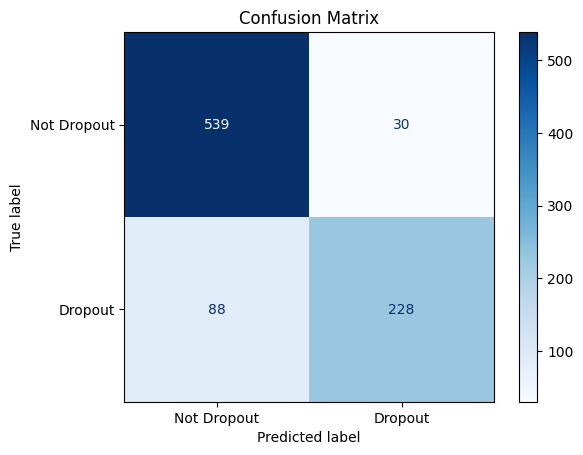

In [ ]:
#To predict whether a student will drop out using logistic regression, and evaluate the model with metrics using a classification report and confusion matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings 
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Fetch dataset
dataset = fetch_ucirepo(id=697)

# Extract features and targets
X = dataset.data.features
y = dataset.data.targets

# Convert Target column to binary (Dropout = 1, others = 0)
y_binary = y['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(max_iter=5000, solver='liblinear')  # Increased max_iter for convergence
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Dropout", "Dropout"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       569
           1       0.78      0.76      0.77       316

    accuracy                           0.84       885
   macro avg       0.82      0.82      0.82       885
weighted avg       0.83      0.84      0.83       885


Confusion Matrix after SMOTE:
[[500  69]
 [ 77 239]]


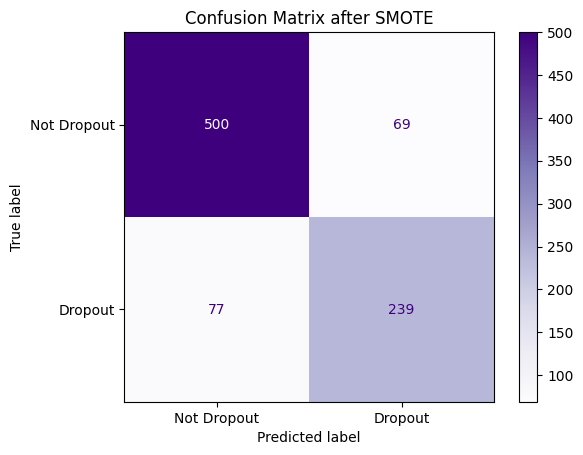

In [20]:
#To predict whether a student will drop out using logistic regression like above, but with SMOTE this time to handle class imbalance before training the model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Fetch dataset
dataset = fetch_ucirepo(id=697)

# Extract features and targets
X = dataset.data.features
y = dataset.data.targets

# Convert Target column to binary (Dropout = 1, others = 0)
y_binary = y['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
logreg.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate model
print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix after SMOTE:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Dropout", "Dropout"])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix after SMOTE")
plt.show()

In [22]:
#Most common mother's occupations among neighbors of graduated students using KNN
#To find the most common mother's occupations among neighbors of graduated students using KNN

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features
y = dataset.data.targets['Target']  # 'Dropout', 'Graduate', 'Enrolled'

# Combine features and target
df = X.copy()
df['Target'] = y

# Save raw Mjob column for later reference
mjob_column = X["Mother's occupation"].copy()

# One-hot encode features for KNN excluding the target
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale features for finding out KNN distance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Fit KNN model to full data
knn = NearestNeighbors(n_neighbors=6)  # 1 self + 5 nearest neighbors
knn.fit(X_scaled)

# Get indices of dropout students
dropout_indices = df[df['Target'] == 'Graduate'].index

# Collect mother's jobs of neighbors (excluding self)
mjob_neighbors = []

for idx in dropout_indices:
    distances, neighbor_idxs = knn.kneighbors([X_scaled[idx]])
    for neighbor_idx in neighbor_idxs[0][1:]:  # Skip the first one (self)
        mjob = mjob_column.iloc[neighbor_idx]  # Pull raw Mjob from original data
        mjob_neighbors.append(mjob)

# Analyze the distribution of mother's jobs
mjob_counts = pd.Series(mjob_neighbors).value_counts()

# Display the result
print("Most common mother's occupations among neighbors of graduated students:\n")
print(mjob_counts.head(5))

Most common mother's occupations among neighbors of graduated students:

9    4206
4    1995
5    1404
3     900
7     817
Name: count, dtype: int64


In [ ]:
#Most common mother's occupations among neighbors of dropout students
#Same as above, but for dropout students

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features
y = dataset.data.targets['Target']  # 'Dropout', 'Graduate', 'Enrolled'

# Combine features and target
df = X.copy()
df['Target'] = y

# Save raw Mjob column for later reference
mjob_column = X["Mother's occupation"].copy()

# One-hot encode features for KNN (excluding the target)
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale features for finding out KNN distance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Fit KNN model to full data
knn = NearestNeighbors(n_neighbors=6)  
knn.fit(X_scaled)

# Get indices of dropout students
dropout_indices = df[df['Target'] == 'Dropout'].index

# Collect mother's jobs of neighbors (excluding self)
mjob_neighbors = []

for idx in dropout_indices:
    distances, neighbor_idxs = knn.kneighbors([X_scaled[idx]])
    for neighbor_idx in neighbor_idxs[0][1:]:  
        mjob = mjob_column.iloc[neighbor_idx]  
        mjob_neighbors.append(mjob)

# Analyze the distribution of mother's jobs
mjob_counts = pd.Series(mjob_neighbors).value_counts()

# Display the result
print("Most common mother's occupations among neighbors of dropout students:\n")
print(mjob_counts.head(5))

Most common mother's occupations among neighbors of dropout students:

9    2625
4    1210
5     813
3     563
2     501
Name: count, dtype: int64


In [31]:
#To find the most common mother's and father's occupations among dropout, graduate, and enrolled students using value_counts instead of KNN

print("\nMother's Occupation for dropout student:")
print(df[df['Target'] == 'Dropout']["Mother's occupation"].value_counts().head(5))
print("\nFather's Occupation for dropout student:")
print(df[df['Target'] == 'Dropout']["Father's occupation"].value_counts().head(5))
print("\nMother's Occupation for Graduated student:")
print(df[df['Target'] == 'Graduate']["Mother's occupation"].value_counts().head(5))
print("\nFather's Occupation for Graduated student:")
print(df[df['Target'] == 'Graduate']["Father's occupation"].value_counts().head(5))
print("\nMother's Occupation for Enrolled student:")
print(df[df['Target'] == 'Enrolled']["Mother's occupation"].value_counts().head(5))
print("\nFather's Occupation for Enrolled student:")
print(df[df['Target'] == 'Enrolled']["Father's occupation"].value_counts().head(5))

#9 - Unskilled Workers
#4 - Administrative staff
#5 - Personal Services, Security and Safety Workers and Sellers
#7 - Skilled Workers in Industry, Construction and Craftsmen
#3 - Intermediate Level Technicians and Professions
#2 - Specialists in Intellectual and Scientific Activities
#0 - Student


Mother's Occupation for dropout student:
Mother's occupation
9    490
4    248
5    156
2    102
0     99
Name: count, dtype: int64

Father's Occupation for dropout student:
Father's occupation
9    323
7    184
5    148
4    139
3    114
Name: count, dtype: int64

Mother's Occupation for Graduated student:
Mother's occupation
9    823
4    422
5    280
3    177
7    144
Name: count, dtype: int64

Father's Occupation for Graduated student:
Father's occupation
9    524
7    371
5    261
3    207
4    173
Name: count, dtype: int64

Mother's Occupation for Enrolled student:
Mother's occupation
9    264
4    147
5     94
3     79
2     78
Name: count, dtype: int64

Father's Occupation for Enrolled student:
Father's occupation
9    163
7    111
5    107
4     74
3     63
Name: count, dtype: int64


In [ ]:
#To find the most common mother's and father's qualifications among dropout, graduate, and enrolled students using value_counts

print("\nMother's qualification for dropout student:")
print(df[df['Target'] == 'Enrolled']["Mother's qualification"].value_counts().head(5))
print("\nFather's qualification for dropout student:")
print(df[df['Target'] == 'Enrolled']["Father's qualification"].value_counts().head(5))
print("\nMother's qualification for graduate student:")
print(df[df['Target'] == 'Graduate']["Mother's qualification"].value_counts().head(5))
print("\nFather's qualification for graduate student:")
print(df[df['Target'] == 'Graduate']["Father's qualification"].value_counts().head(5))
print("\nMother's qualification for enrolled student:")
print(df[df['Target'] == 'Enrolled']["Mother's qualification"].value_counts().head(5))
print("\nFather's qualification for enrolled student:")
print(df[df['Target'] == 'Enrolled']["Father's qualification"].value_counts().head(5))

#37 - Basic education 1st cycle (4th/5th year) or equiv
#1 - Secondary Education - 12th Year of Schooling or Eq.
#19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
#38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
#3 - Basic Education 1st Cycle (4th/5th Year) or Equiv.



 Mother's qualification for dropout student:
Mother's qualification
1     204
19    176
37    169
3     101
38     91
Name: count, dtype: int64

   Father's qualification for dropout student:
Father's qualification
37    199
19    183
1     172
38    127
3      62
Name: count, dtype: int64

   Mother's qualification for graduate student:
Mother's qualification
1     565
19    506
37    457
38    331
3     198
Name: count, dtype: int64

   Father's qualification for graduate student:
Father's qualification
37    578
19    521
1     451
38    408
3     130
Name: count, dtype: int64

   Mother's qualification for enrolled student:
Mother's qualification
1     204
19    176
37    169
3     101
38     91
Name: count, dtype: int64

   Father's qualification for enrolled student:
Father's qualification
37    199
19    183
1     172
38    127
3      62
Name: count, dtype: int64


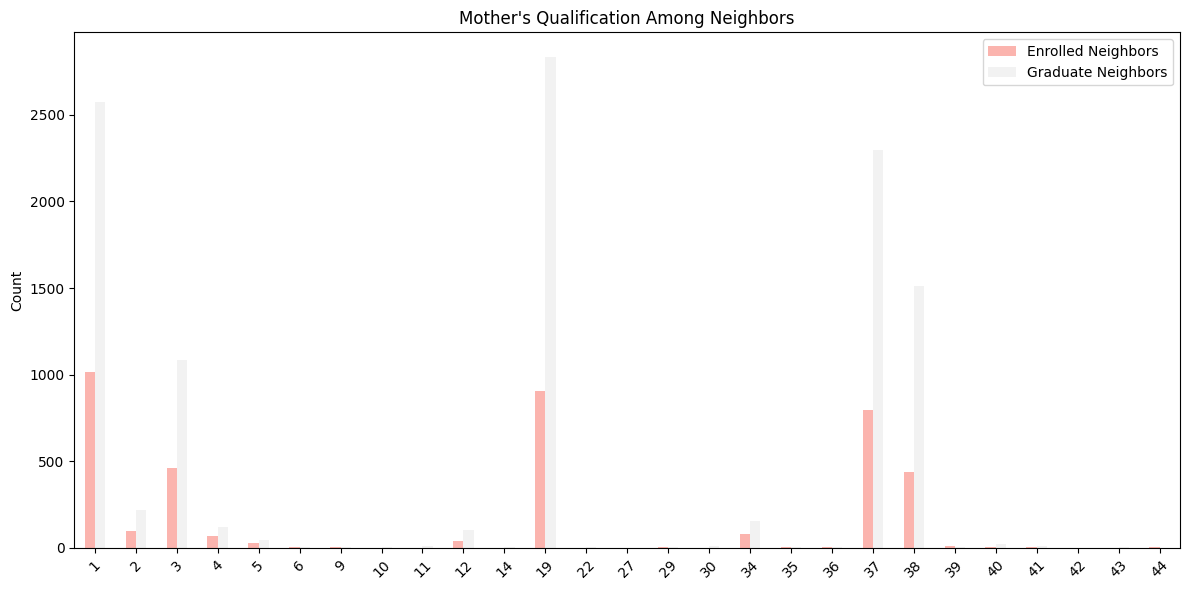

In [ ]:
#To find the most common mother's qualifications among neighbors of enrolled and graduate students using KNN

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Load dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features
y = dataset.data.targets['Target']  # 'Dropout', 'Graduate', 'Enrolled'

# Combine features and target
df = X.copy()
df['Target'] = y

# Save raw Mjob column for later reference
mjob_column = X["Mother's qualification"].copy()

# One-hot encode features for KNN
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Fit KNN model
knn = NearestNeighbors(n_neighbors=6)  # 1 self + 5 neighbors
knn.fit(X_scaled)

# Function to collect Mjob info from neighbors
def get_mother_job_neighbors(group_label):
    indices = df[df['Target'] == group_label].index
    mjob_neighbors = []

    for idx in indices:
        distances, neighbor_idxs = knn.kneighbors([X_scaled[idx]])
        for neighbor_idx in neighbor_idxs[0][1:]:  # skip self
            mjob = mjob_column.iloc[neighbor_idx]
            mjob_neighbors.append(mjob)

    return pd.Series(mjob_neighbors).value_counts()

# Get distributions for Enrolled and Graduate students
enrolled_mjobs = get_mother_job_neighbors('Enrolled')
graduate_mjobs = get_mother_job_neighbors('Graduate')

# Visualize side by side
comparison_df = pd.DataFrame({
    'Enrolled Neighbors': enrolled_mjobs,
    'Graduate Neighbors': graduate_mjobs
}).fillna(0)

comparison_df.plot(kind='bar', figsize=(12, 6), colormap='Pastel1')
plt.title("Mother's Qualification Among Neighbors")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#To predict whether a student will drop out using logistic regression, and evaluate the model with metrics using a classification report and confusion matrix

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features
y = dataset.data.targets['Target']  # 'Dropout', 'Graduate', 'Enrolled'

# Convert target to binary (e.g., Dropout = 1, others = 0)
y_binary = y.apply(lambda x: 1 if x == 'Dropout' else 0)

# Select relevant academic performance columns
academic_cols = ['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure academic columns are included
for col in academic_cols:
    if col not in X_encoded.columns:
        X_encoded[col] = X[col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Model evaluation
y_pred = logreg.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature coefficients
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n Top Influential Features (Logistic Regression Coefficients):")
print(coef_df.head(10))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       569
           1       0.88      0.72      0.79       316

    accuracy                           0.87       885
   macro avg       0.87      0.83      0.85       885
weighted avg       0.87      0.87      0.86       885


 Top Influential Features (Logistic Regression Coefficients):
                                Feature  Coefficient
30  Curricular units 2nd sem (approved)    -1.866441
28  Curricular units 2nd sem (enrolled)     1.114171
24  Curricular units 1st sem (approved)    -0.976295
16              Tuition fees up to date    -0.762553
27  Curricular units 2nd sem (credited)     0.484580
21  Curricular units 1st sem (credited)     0.420171
19                    Age at enrollment     0.382771
31     Curricular units 2nd sem (grade)    -0.368263
10                  Mother's occupation    -0.336134
25     Curricular units 1st sem (grade)     0.291597


In [39]:
#To train a Random Forest model on the same encoded data and find the top 10 influential features

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on the same encoded data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
rf_importance = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

print("\nTop Influential Features (Random Forest):")
print(rf_importance.head(10))


Top Influential Features (Random Forest):
Curricular units 2nd sem (approved)       0.153905
Curricular units 2nd sem (grade)          0.141506
Curricular units 1st sem (approved)       0.080268
Curricular units 1st sem (grade)          0.063830
Tuition fees up to date                   0.063040
Age at enrollment                         0.040424
Curricular units 2nd sem (evaluations)    0.038035
Admission grade                           0.035900
Previous qualification (grade)            0.033026
Course                                    0.032665
dtype: float64
